# Red-Sequence

Here we plot the redsequence for Skysim5000

In [2]:
import glob,os
import numpy as np
import pandas as pd

import GCRCatalogs as gcr
from fitsio import FITS
from astropy.table import Table, join

import matplotlib.pyplot as plt
plt.style.use('MNRAS.mplstyle')

In [4]:
file_pathc = r"/global/u1/k/kamau/SE-CLMM-LSSTDESC/project-1/Notebooks/Workshop-Arizona"
filepathc = r"/global/cfs/projectdirs/des/chto/Cardinal/v3/"

redmapper_file_clc = FITS(filepathc+"redmapper_v4_v8_v51_y6_v7/run/Cardinal-3Y6a_v2.0_run_run_redmapper_v0.8.1_lgt20_vl02_catalog.fit", mode=0)
redmapper_clc = Table(redmapper_file_clc[1].read())
print(len(redmapper_clc))

redmapper_file_mec = FITS(filepathc+"redmapper_v4_v8_v51_y6_v7/run/Cardinal-3Y6a_v2.0_run_run_redmapper_v0.8.1_lgt20_vl02_catalog_members.fit", mode=0)
redmapper_mec = Table(redmapper_file_mec[1].read())
print(len(redmapper_mec))

redmapper_cl_fc = redmapper_clc[(redmapper_clc['z_lambda']>=0.2) & (redmapper_clc['z_lambda']<=0.95)]
print(len(redmapper_cl_fc))
zrangesc = [(0.2,0.35), (0.35, 0.5), (0.5, 0.65), (0.65, 0.8), (0.8,0.95)] #, 
lamrangesc = [(20,30), (30,45), (45,60), (60,500)]
zlabelsc = ['(0.2,0.35]', '(0.35, 0.5]', '(0.5, 0.65]', '(0.65, 0.8]', '(0.8,0.95]'] #, '(0.8,0.95]'
lamlabelsc = ['(20,30]', '(30,45]', '(45,60]', '(60,500]']
redmapper_cl_fc['redshift_range'] = pd.cut(redmapper_cl_fc['z_lambda'], bins=[r[0] for r in zrangesc] + [zrangesc[-1][-1]], labels=zlabelsc)
redmapper_cl_fc['lambda_range'] = pd.cut(redmapper_cl_fc['lambda'], bins=[r[0] for r in lamrangesc] + [lamrangesc[-1][-1]], labels=lamlabelsc)

groupedc = redmapper_cl_fc.group_by(['redshift_range', 'lambda_range'])
cluster_countsc = groupedc.groups.aggregate(len)
cluster_countsc['mem_match_id', 'redshift_range', 'lambda_range']
## Grouping by redshift only
groupedc1 = redmapper_cl_fc.group_by(['redshift_range'])
cluster_countsc1 = groupedc1.groups.aggregate(len)

15755
1043744
15699


# Skysim5000 -  redMaPPer

In [5]:
## Lets load the redmapper clusters and members

redmapper = gcr.load_catalog('skysim5000_v1.1.1_redmapper_v0.8.5')
redmapper_cl = Table(redmapper.get_quantities(['cluster_id','ra','dec','redshift','richness','clusters/mem_match_id','clusters/z_lambda']))
redmapper_me = Table(redmapper.get_quantities(['p_member','members/ra','members/dec','members/mem_match_id','members/z',
                                               'members/mag/0','members/mag/1','members/mag/2','members/mag/3','members/mag/4']))
print(len(redmapper_cl),len(redmapper_me))

46491 2381320


In [4]:
redmapper_cl_f = redmapper_cl[(redmapper_cl['clusters/z_lambda']<=0.95) & (redmapper_cl['clusters/z_lambda']>=0.2)]
print(redmapper_cl_f['richness'].min())
print(len(redmapper_cl_f))
zranges = [(0.2,0.35), (0.35, 0.5), (0.5, 0.65), (0.65, 0.8), (0.8,0.95)] #, 
lamranges = [(20,30), (30,45), (45,60), (60,500)]
zlabels = ['(0.2,0.35]', '(0.35, 0.5]', '(0.5, 0.65]', '(0.65, 0.8]', '(0.8,0.95]'] #, '(0.8,0.95]'
lamlabels = [ '(20,30]', '(30,45]', '(45,60]', '(60,500]']
redmapper_cl_f['redshift_range'] = pd.cut(redmapper_cl_f['clusters/z_lambda'], bins=[r[0] for r in zranges] + [zranges[-1][-1]], labels=zlabels)
redmapper_cl_f['lambda_range'] = pd.cut(redmapper_cl_f['richness'], bins=[r[0] for r in lamranges] + [lamranges[-1][-1]], labels=lamlabels)

grouped = redmapper_cl_f.group_by(['redshift_range', 'lambda_range'])
cluster_counts = grouped.groups.aggregate(len)
cluster_counts['clusters/mem_match_id', 'redshift_range', 'lambda_range']

## Grouping by redshift only
grouped1 = redmapper_cl_f.group_by(['redshift_range'])
cluster_counts1 = grouped1.groups.aggregate(len)

20.003485
36370


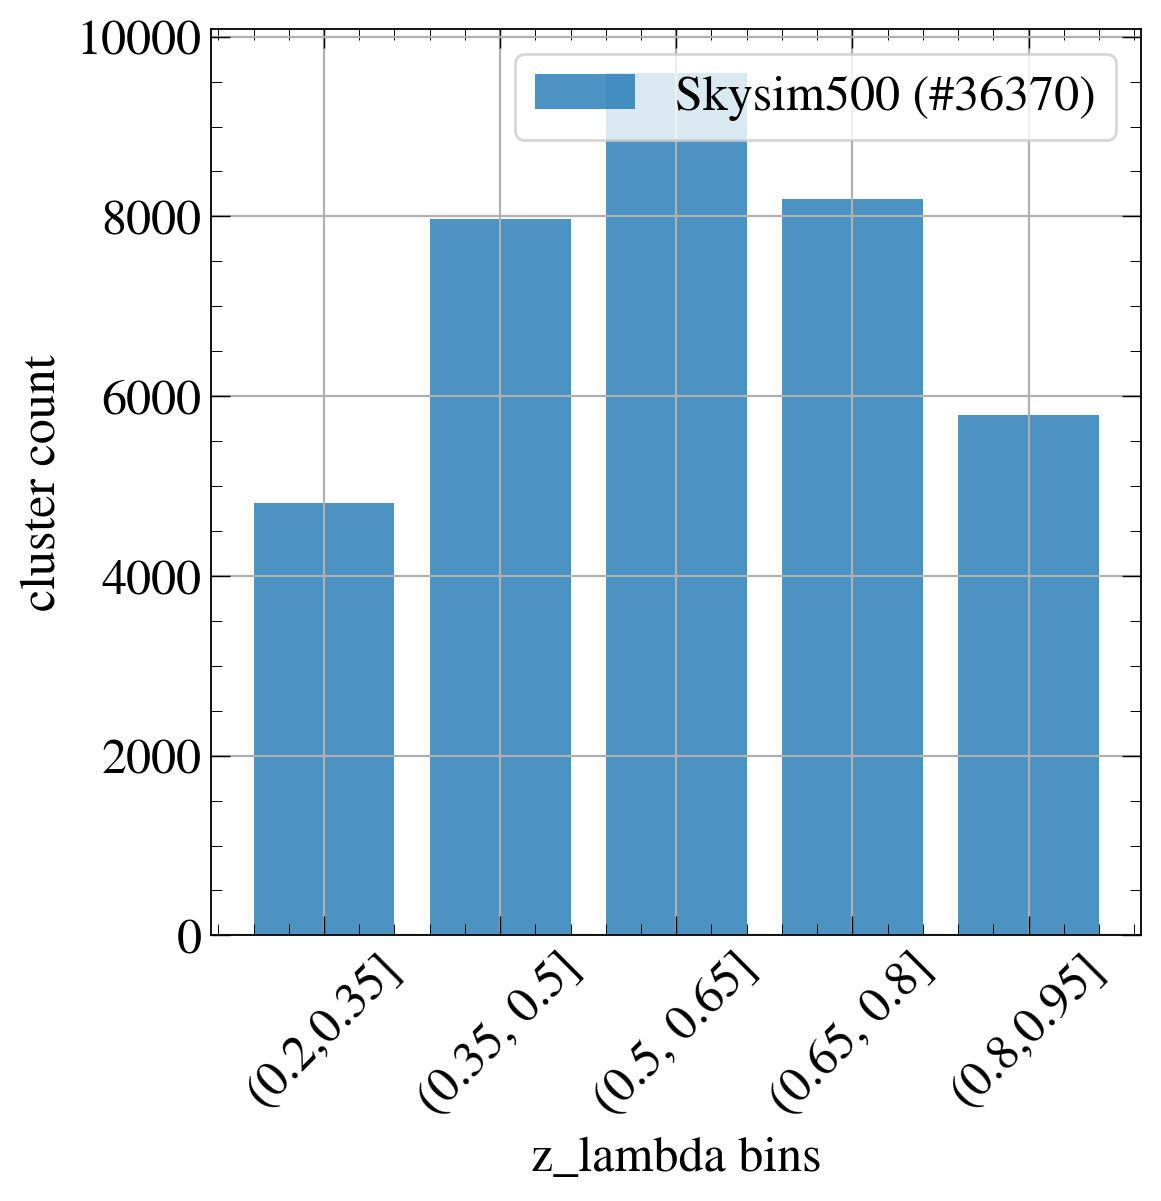

In [5]:
plt.bar(cluster_counts1['redshift_range'], cluster_counts1['clusters/mem_match_id'], alpha=0.8, label='Skysim500 (#36370)')
# plt.bar(cluster_counts1['redshift_range'], cluster_counts1['mem_match_id'], alpha=0.6, label='Cardinal (#15699)')
plt.ylabel('cluster count')
plt.xlabel('z_lambda bins')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [9]:
## Lets filters the clusters based on z_lambda and p_member>0.9
redmapper_cl2 = redmapper_cl[(redmapper_cl['clusters/z_lambda']>=0.25) & (redmapper_cl['clusters/z_lambda']<0.26)]
print(len(redmapper_cl2))
redmapper_me2 = redmapper_me[(np.isin(redmapper_me['members/mem_match_id'],redmapper_cl2['clusters/mem_match_id'])) & 
                            (redmapper_me['p_member']>0.9)]
print(len(redmapper_me2))

343
9579


In [10]:
g = redmapper_me2['members/mag/0']
r = redmapper_me2['members/mag/1']
i = redmapper_me2['members/mag/2']
z = redmapper_me2['members/mag/3'] #np.array([item[3] for item in np.array(redmapper_me2['members/mag/3'])])
y = redmapper_me2['members/mag/4']
len(g), len(r), len(i), len(z), len(y)

(9579, 9579, 9579, 9579, 9579)

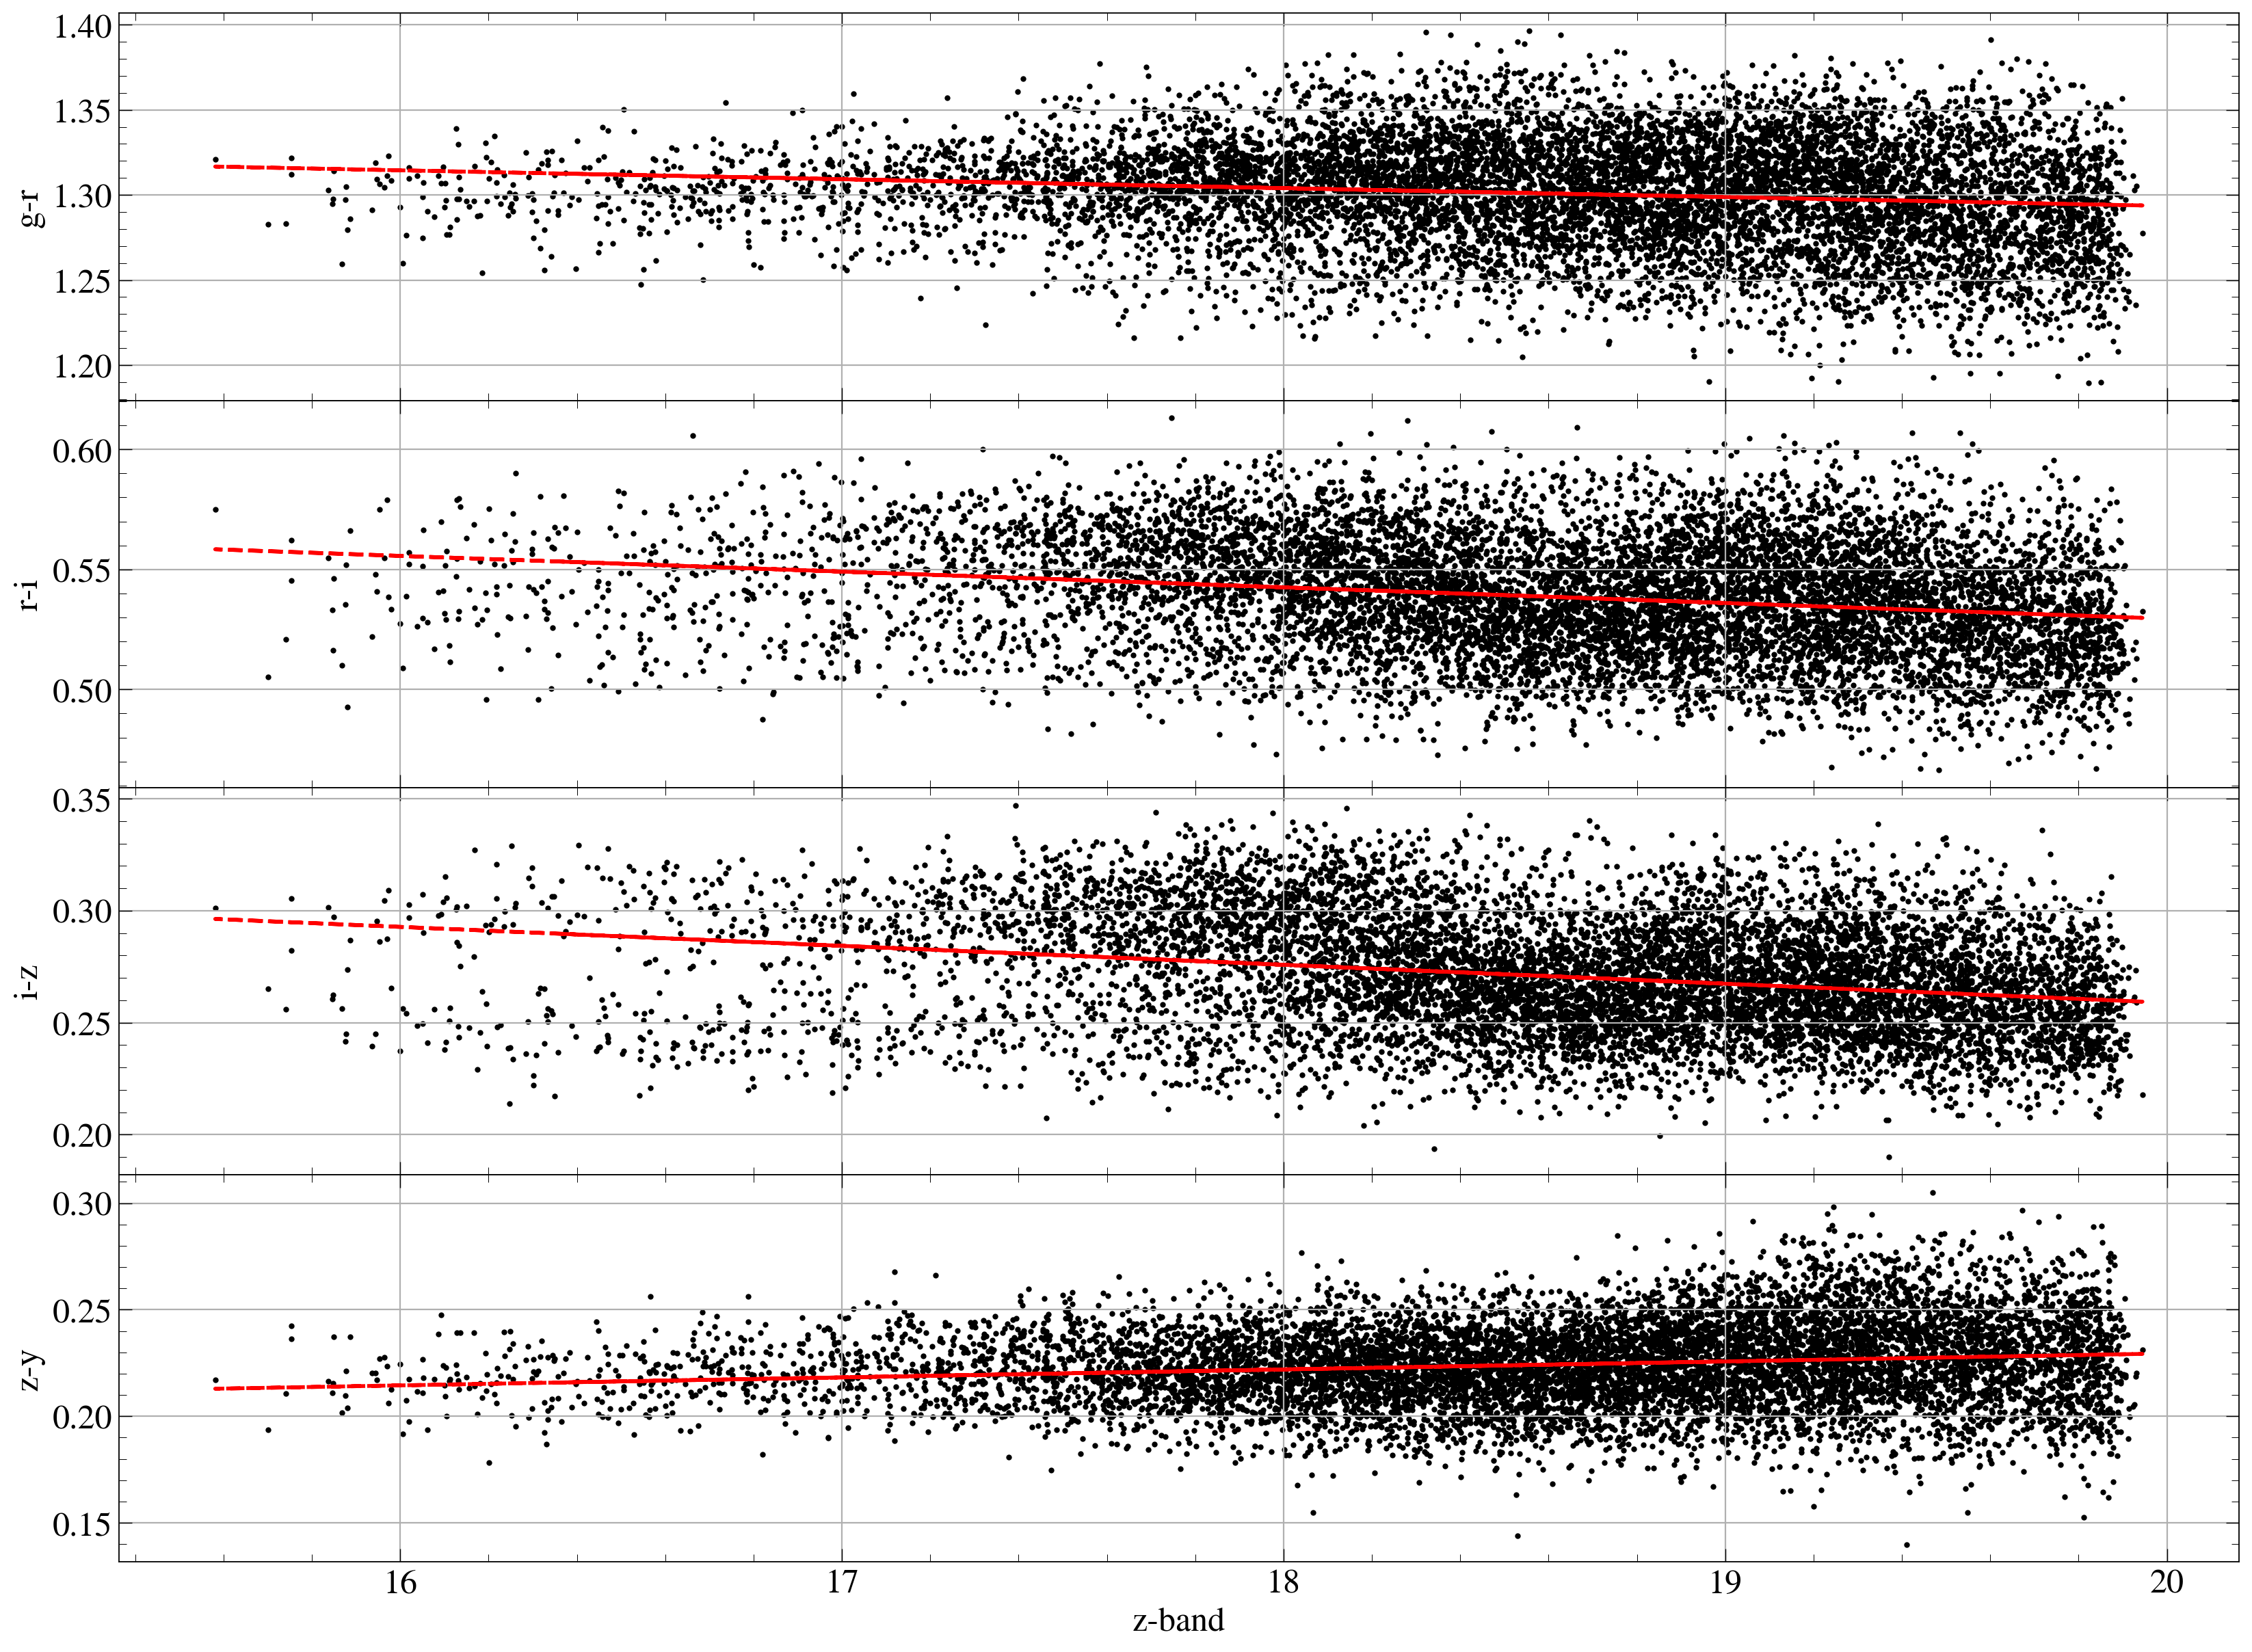

In [11]:
## Color-index <0.5 is blue(hot) ; >1.5 is red(cold) galaxy colour magnitude diagram
x = z
y1 = g-r
y2 = r-i
y3 = i-z
y4 = z-y

#find line of best fit
a1, b1 = np.polyfit(x, y1, 1)
a2, b2 = np.polyfit(x, y2, 1)
a3, b3 = np.polyfit(x, y3, 1)
a4, b4 = np.polyfit(x, y4, 1)

fig, axs = plt.subplots(4, 1, sharex=True, figsize=(20,15))
fig.subplots_adjust(hspace=0) # Remove horizontal space between axes

# Plot each graph, and manually set the y tick values
axs[0].scatter(x,y1, c='k', s=4)
axs[0].plot(x, a1*x+b1, color='red', linestyle='--', linewidth=2)
axs[0].set_ylabel('g-r')

axs[1].scatter(x,y2, c='k', s=4)
axs[1].plot(x, a2*x+b2, color='red', linestyle='--', linewidth=2)
axs[1].set_ylabel('r-i')

axs[2].scatter(x,y3, c='k', s=4)
axs[2].plot(x, a3*x+b3, color='red', linestyle='--', linewidth=2)
axs[2].set_ylabel('i-z')

axs[3].scatter(x,y4, c='k', s=4)
axs[3].plot(x, a4*x+b4, color='red', linestyle='--', linewidth=2)
axs[3].set_ylabel('z-y')

axs[3].set_xlabel('z-band')

plt.show()

In [12]:
redshift_bin = np.linspace(0.2,1,17)
labels = np.round(np.arange(0.2, 1, 0.1/2),2).tolist()
redshift_bin

array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 ,
       0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [13]:
# Here we filter on redshift (z) 
redmapper_me3 = redmapper_me[(redmapper_me['p_member']>0.9) & (redmapper_me['members/z']>0.2) & (redmapper_me['members/z']<1)]
print(len(redmapper_me3))
mag = Table()
mag['g'] = redmapper_me3['members/mag/0']
mag['r'] = redmapper_me3['members/mag/1']
mag['i'] = redmapper_me3['members/mag/2']
mag['z'] = redmapper_me3['members/mag/3']
mag['y'] = redmapper_me3['members/mag/4']
mag['redshift'] = np.array(redmapper_me3['members/z'])

1049892


In [14]:
mag['g_r'] = mag['g'] - mag['r']
mag['r_i'] = mag['r'] - mag['i']
mag['i_z'] = mag['i'] - mag['z']
mag['z_y'] = mag['z'] - mag['y']
mag['redshift_bins'] = pd.cut(mag['redshift'], bins=redshift_bin, labels=labels, include_lowest=True)

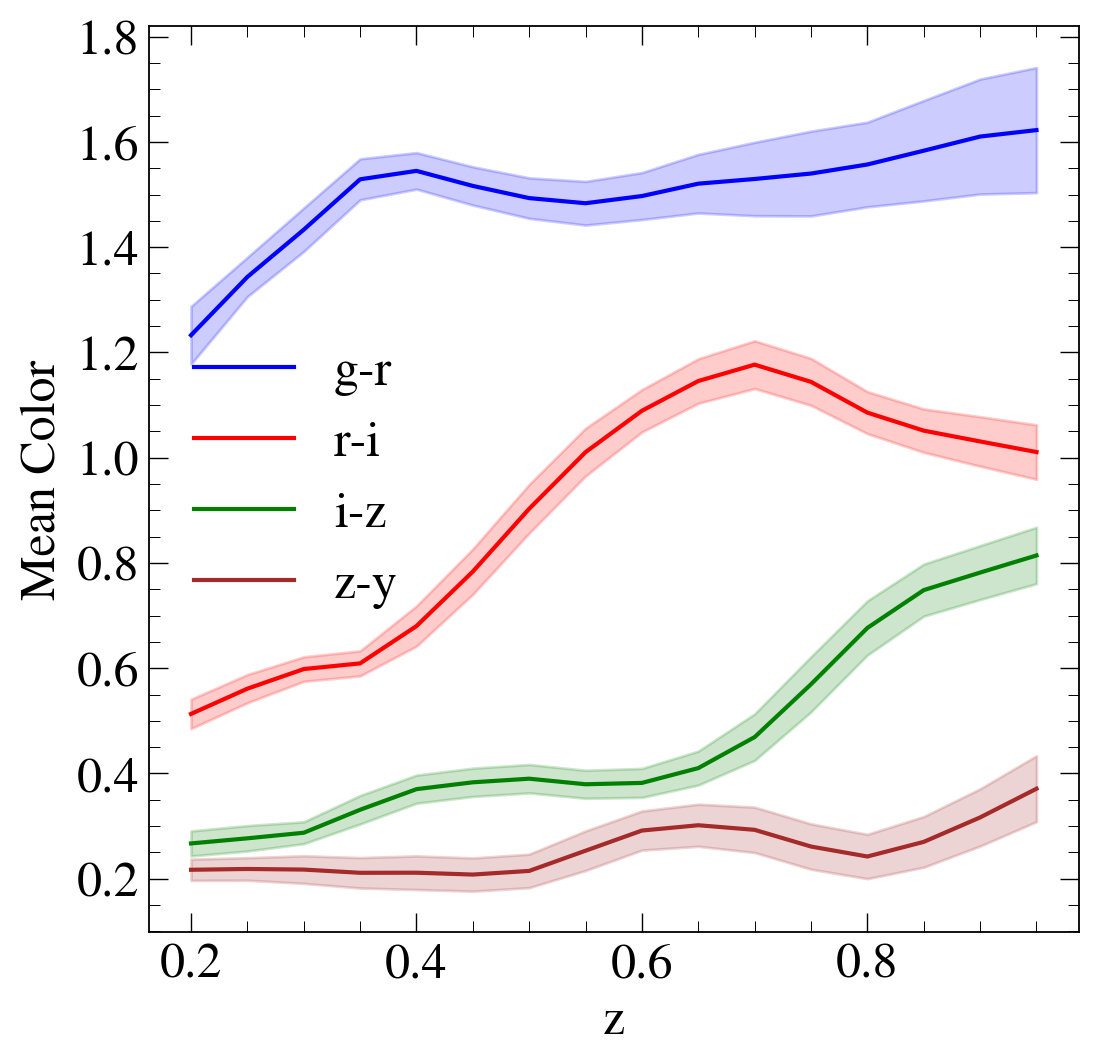

In [16]:
grouped_table = mag.group_by('redshift_bins')
median = grouped_table['g_r','r_i','i_z','z_y','redshift','redshift_bins'].groups.aggregate(np.median)
mean = grouped_table['g_r','r_i','i_z','z_y','redshift','redshift_bins'].groups.aggregate(np.mean)
err = grouped_table['g_r','r_i','i_z','z_y','redshift_bins'].groups.aggregate(np.std)
err.rename_columns(['g_r','r_i','i_z','z_y'], ['gr_err','ri_err','iz_err','zy_err'])

# plt.figure(figsize=(12,8))
X_m = mean['redshift_bins']
Yg = mean['g_r']
Yr = mean['r_i']
Yi = mean['i_z']
Yz = mean['z_y']
Yz = mean['z_y']

plt.plot(X_m,Yg, c='blue', label='g-r')
plt.fill_between(X_m,Yg+err['gr_err'],Yg-err['gr_err'], color='blue', alpha=0.2)
plt.plot(X_m,Yr, c='red', label='r-i')
plt.fill_between(X_m,Yr+err['ri_err'],Yr-err['ri_err'], color='red', alpha=0.2)
plt.plot(X_m,Yi, c='green', label='i-z')
plt.fill_between(X_m,Yi+err['iz_err'],Yi-err['iz_err'], color='green', alpha=0.2)
plt.plot(X_m,Yz, c='brown', label='z-y')
plt.fill_between(X_m,Yz+err['zy_err'],Yz-err['zy_err'], color='brown', alpha=0.2)
plt.ylabel('Mean Color')
plt.xlabel('z')
plt.legend(frameon=False)
plt.grid()
filep = r'/global/u1/k/kamau/SE-CLMM-LSSTDESC/project-1/'
plt.savefig(filep+'Images/skysim_redSequence.png', facecolor='white')
plt.show()

## redsequence template

In [ ]:
full_mag = join(mag,err, keys=['redshift_bins'])
print(len(full_mag))
full_mag[:5]

1049892


g,r,i,z,y,redshift,g_r,r_i,i_z,z_y,redshift_bins,gr_err,ri_err,iz_err,zy_err
float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32
20.306128,19.12695,18.653612,18.350513,18.126492,0.21490037,1.1791782,0.47333717,0.30309868,0.22402191,0.2,0.0548082,0.02789051,0.023701238,0.0201733
21.129301,19.90031,19.358315,19.067984,18.847908,0.22241887,1.2289906,0.541996,0.2903309,0.2200756,0.2,0.0548082,0.02789051,0.023701238,0.0201733
20.996815,19.77298,19.285112,19.04832,18.823774,0.22241887,1.223835,0.48786736,0.23679161,0.22454643,0.2,0.0548082,0.02789051,0.023701238,0.0201733
21.493084,20.207607,19.675549,19.399645,19.161257,0.22241887,1.2854767,0.5320587,0.2759037,0.23838806,0.2,0.0548082,0.02789051,0.023701238,0.0201733
20.67074,19.384592,18.847483,18.57722,18.351757,0.22241887,1.2861481,0.5371094,0.27026176,0.22546387,0.2,0.0548082,0.02789051,0.023701238,0.0201733


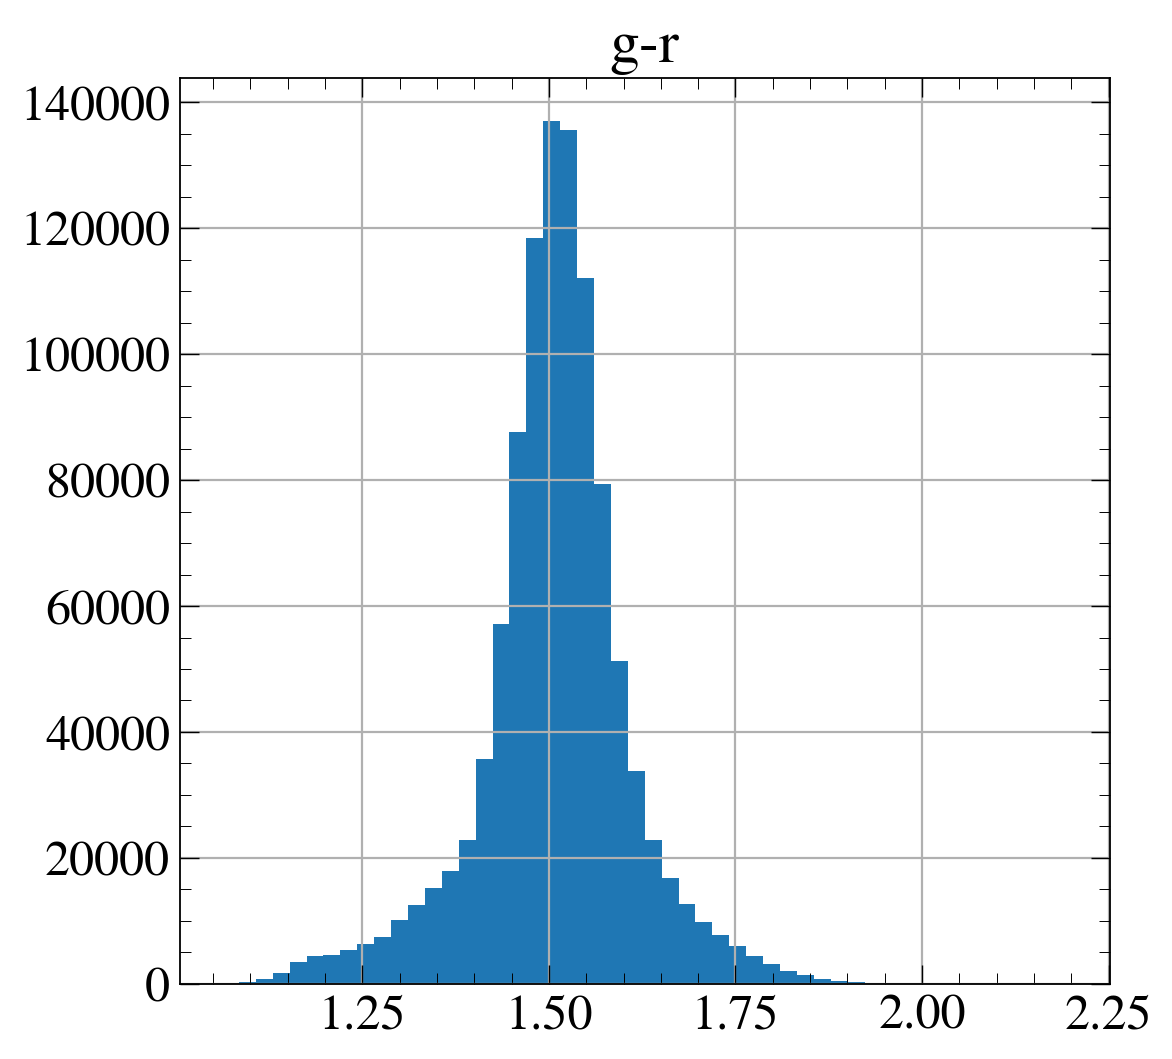

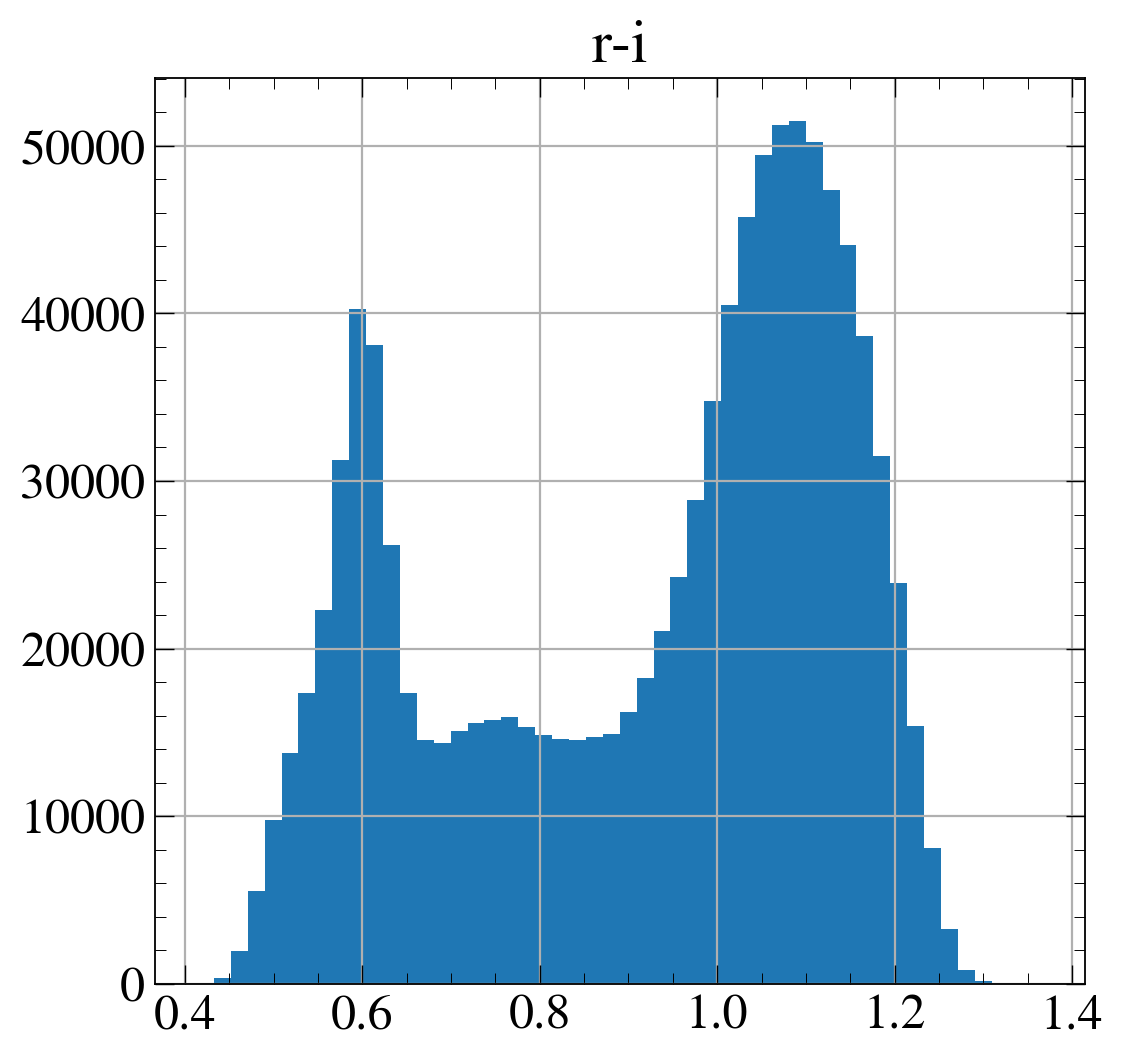

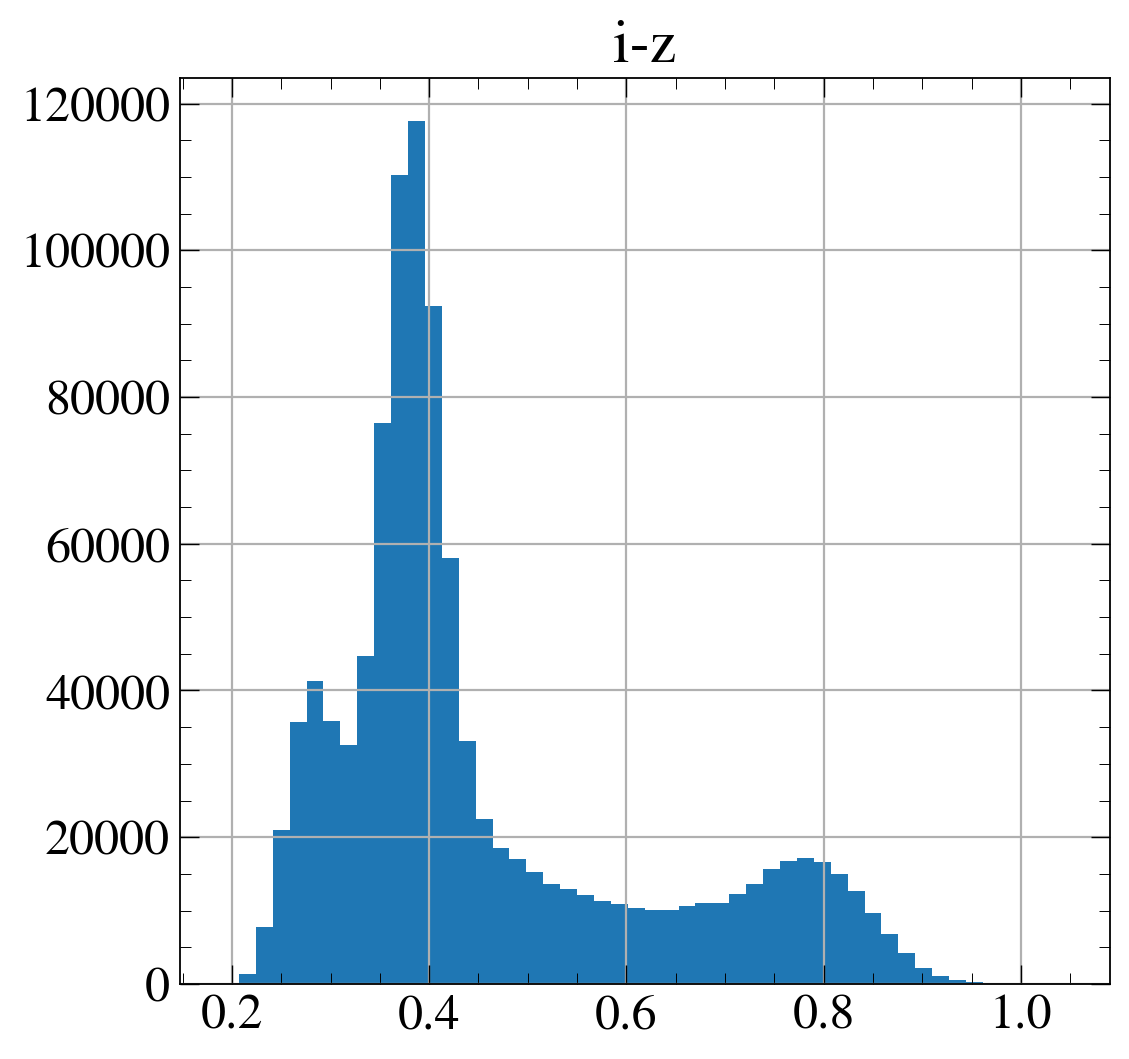

In [ ]:
plt.hist(full_mag['g_r'], bins=50)
plt.title('g-r')
plt.show()
plt.hist(full_mag['r_i'], bins=50)
plt.title('r-i')
plt.show()
plt.hist(full_mag['i_z'], bins=50)
plt.title('i-z')
plt.show()

In [75]:
mean['grlow'], mean['grhigh'] = mean['g_r']-err['gr_err'], mean['g_r']+err['gr_err']
mean['rilow'], mean['rihigh'] = mean['r_i']-err['ri_err'], mean['r_i']+err['ri_err']
mean['izlow'], mean['izhigh'] = mean['i_z']-err['iz_err'], mean['i_z']+err['iz_err']
mean['zylow'], mean['zyhigh'] = mean['z_y']-err['zy_err'], mean['z_y']+err['zy_err']

In [76]:
mag_gr = mean['redshift', 'g_r', 'grlow', 'grhigh']
mag_ri = mean['redshift', 'r_i', 'rilow', 'rihigh']
mag_iz = mean['redshift', 'i_z', 'izlow', 'izhigh']
mag_zy = mean['redshift', 'z_y', 'zylow', 'zyhigh']
print(len(mag_gr))

16


In [77]:
mag_ri

redshift,r_i,rilow,rihigh
float64,float64,float64,float64
0.22699516729942984,0.5131235201279488,0.48523300927084356,0.5410140309850541
0.2735482028069155,0.5611016033965783,0.53427043285255,0.5879327739406066
0.3243317643291892,0.5983474359390054,0.5750283740934644,0.6216664977845464
0.3784415951298265,0.6091638141154835,0.5854178023367712,0.6329098258941958
0.4287874460124548,0.6800389944924333,0.64177640000119,0.7183015889836767
0.47425969035321197,0.7836035589813795,0.7405009443997945,0.8267061735629644
0.5260878991811532,0.9029405050716023,0.8566794813415627,0.9492015288016419
0.5749678762062406,1.0105595036612325,0.9651698253320031,1.0559491819904618
0.622152053786351,1.0891584599245332,1.0488915102411054,1.129425409607961


In [45]:
## Here we save the files (redsequence templates)
# mag_gr.write('/global/u1/k/kamau/SE-CLMM-LSSTDESC/cosmoDC2/Data/skysim-members/g_r.dat', format='ascii')
# mag_ri.write('/global/u1/k/kamau/SE-CLMM-LSSTDESC/cosmoDC2/Data/skysim-members/r_i.dat', format='ascii')
# mag_iz.write('/global/u1/k/kamau/SE-CLMM-LSSTDESC/cosmoDC2/Data/skysim-members/i_z.dat', format='ascii')
# mag_zy.write('/global/u1/k/kamau/SE-CLMM-LSSTDESC/cosmoDC2/Data/skysim-members/z_y.dat', format='ascii')

# Investigating the magnitude cut and color cut
When plotting the weak lensing signals, we observed an unxepected and behaviour and as result we started debuging the code by looking at the magnitude and the color cuts.

In [45]:
import healpy as hp
skysim = gcr.load_catalog('skysim5000_v1.1.1')

hpix = 6080
nside = 32
hpix_list = skysim.available_healpix_pixels
hpix_neighbors = hp.pixelfunc.get_all_neighbours(nside, hpix)
hpix_toread = list(set(hpix_list) & set(hpix_neighbors))
hpix_toread.append(hpix)
# print(hpix_toread)

## Getting the galaxies
ra_all = []
dec_all = []
z_all = []
mag_g_all = []
mag_r_all = []
mag_i_all = []
mag_z_all = []
mag_y_all = []

## getting galaxies
for hpix_i in hpix_toread:
    galaxy_data = skysim.get_quantities(['redshift','ra', 'dec','mag_true_g','mag_true_r',
                                         'mag_true_i','mag_true_z','mag_true_y'], 
                                        native_filters=f'healpix_pixel == {hpix_i}')

    ra_all.extend(galaxy_data['ra'])
    dec_all.extend(galaxy_data['dec'])
    z_all.extend(galaxy_data['redshift'])
    mag_g_all.extend(galaxy_data['mag_true_g'])
    mag_r_all.extend(galaxy_data['mag_true_r'])
    mag_i_all.extend(galaxy_data['mag_true_i'])
    mag_z_all.extend(galaxy_data['mag_true_z'])
    mag_y_all.extend(galaxy_data['mag_true_y'])
    
ra_all = np.array(ra_all)
dec_all = np.array(dec_all)
z_all = np.array(z_all)
mag_g_all = np.array(mag_g_all)
mag_r_all = np.array(mag_r_all)
mag_i_all = np.array(mag_i_all)
mag_z_all = np.array(mag_z_all)
mag_y_all = np.array(mag_y_all)   
    
print(len(mag_i_all))

19529286


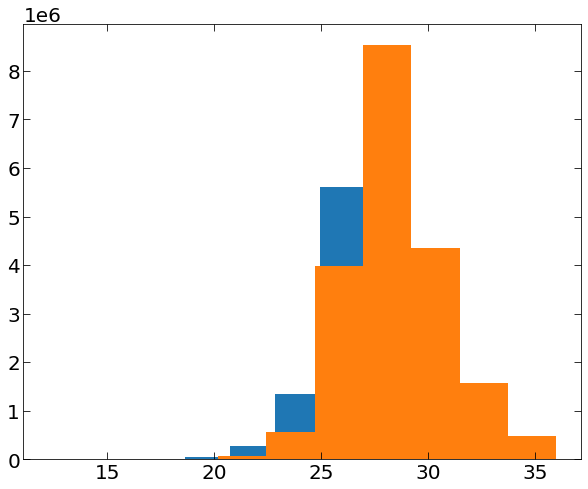

In [46]:
plt.hist(mag_i_all)
plt.hist(mag_g_all)
plt.show()

In [81]:
zmin, zmax = 0.3, 0.32

sel = (z_all >= zmin-0.1)&(z_all <= zmax+0.1) # &(mag_i_all > 10)&(mag_i_all < mag_i_cut)
# z1 = gals_fil['redshift']

i = mag_i_all[sel]
g_r = mag_g_all[sel] - mag_r_all[sel]
r_i = mag_r_all[sel] - mag_i_all[sel]
i_z = mag_i_all[sel] - mag_z_all[sel]
z_y = mag_z_all[sel] - mag_y_all[sel]
grhigh = g_r + np.std(g_r)
grlow = g_r - np.std(g_r)

print(len(i), len(g_r))

##################################################################################
# from member_color_interp import *
chisq_cut = 9

g_r_mean = g_r_vs_redshift(zmin)
r_i_mean = r_i_vs_redshift(zmin)
g_r_std = sigma_g_r_vs_redshift(zmin)

chisq1 = (g_r - g_r_mean)**2 / g_r_std**2

sel2 = (chisq1 < chisq_cut)

print(len(chisq1), len(sel2),r_i_mean)

ra_gal1 = ra_all[sel]

ra_gal = ra_gal1[sel2] * np.pi / 180.

print('done selecting galaxies, ngals = ', len(ra_gal))

312152 312152
312152 312152 0.580414179272265
done selecting galaxies, ngals =  25886


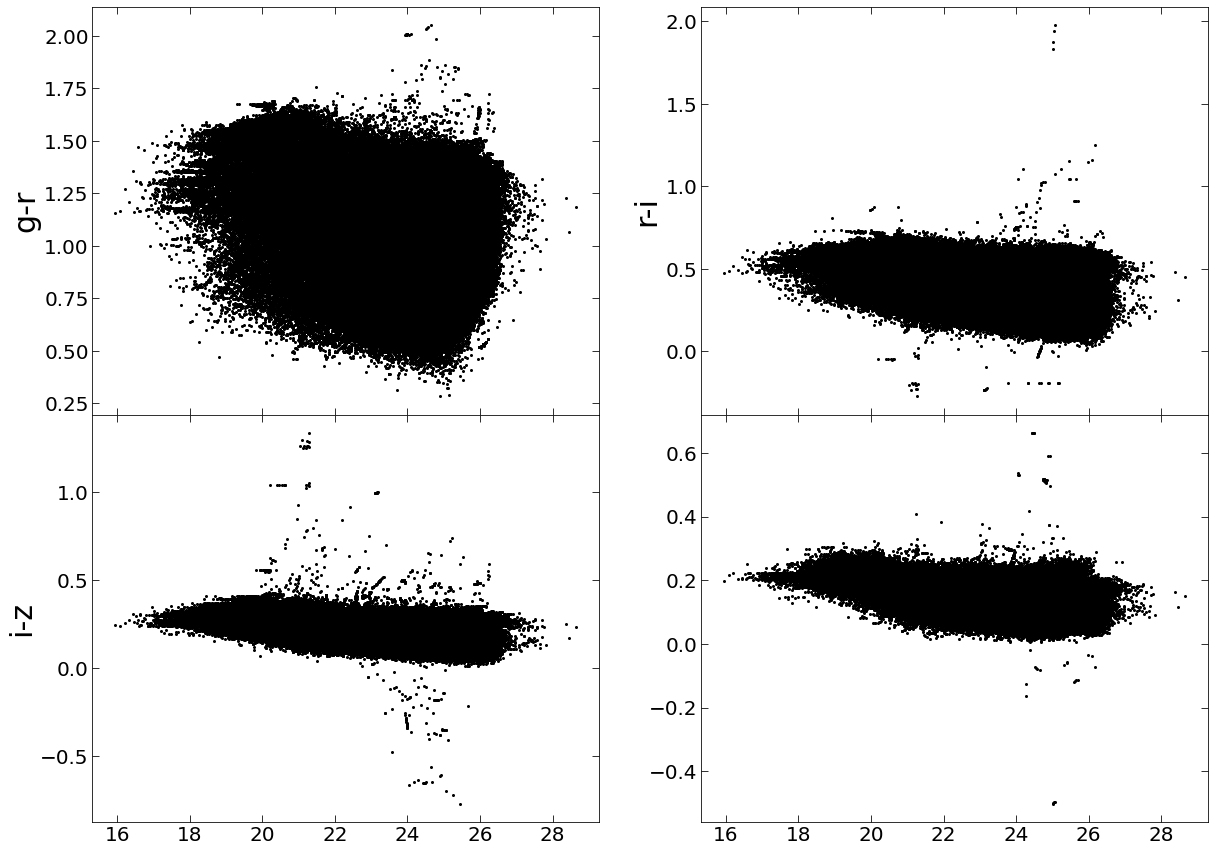

In [82]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(20,15))
fig.subplots_adjust(hspace=0)

# Plot each graph, and manually set the y tick values
axs[0][0].scatter(z, g_r, c='k', s=4)
axs[0][0].set_ylabel('g-r')

axs[0][1].scatter(z, r_i, c='k', s=4)
axs[0][1].set_ylabel('r-i')

axs[1][0].scatter(z, i_z, c='k', s=4)
axs[1][0].set_ylabel('i-z')

axs[1][1].scatter(z, z_y, c='k', s=4)

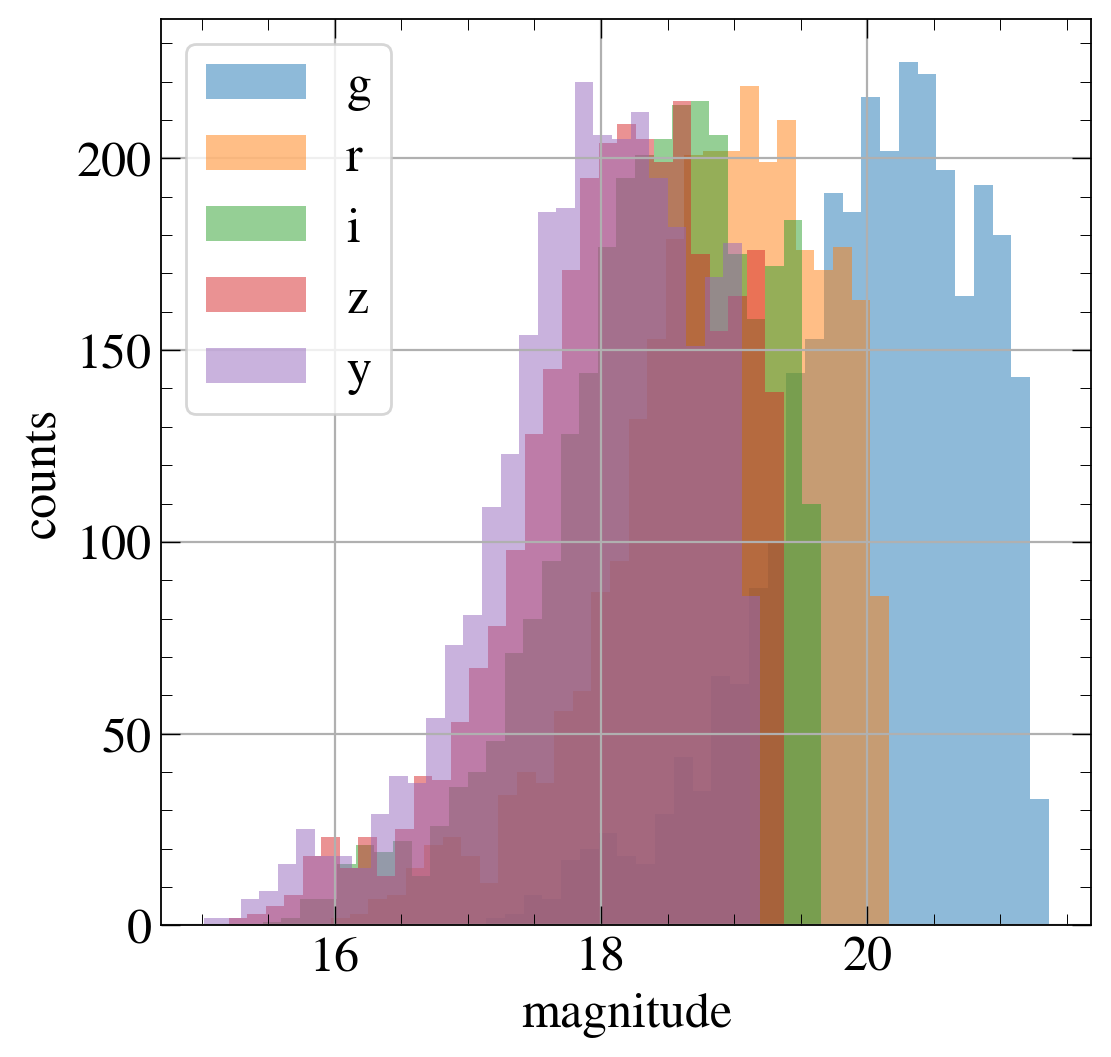

In [80]:
redmapper_me1 = redmapper_me[(redmapper_me['members/z']>0.2) & (redmapper_me['members/z']<0.205) & (redmapper_me['p_member']>0.9)]
bands = ['g','r','i','z','y']

# for indx in range(5):
#     me_band = [i[indx] for i in redmapper_me1['mag']]
#     print(np.max(me_band))
#     # print(np.min(me_band))
#     plt.hist(me_band, bins=30, label=bands[indx], alpha=0.5, rwidth=1)
plt.hist(redmapper_me1['members/mag/0'], bins=30, label='g', alpha=0.5, rwidth=1)
plt.hist(redmapper_me1['members/mag/1'], bins=30, label='r', alpha=0.5, rwidth=1)
plt.hist(redmapper_me1['members/mag/2'], bins=30, label='i', alpha=0.5, rwidth=1)
plt.hist(redmapper_me1['members/mag/3'], bins=30, label='z', alpha=0.5, rwidth=1)
plt.hist(redmapper_me1['members/mag/4'], bins=30, label='y', alpha=0.5, rwidth=1)
plt.xlabel('magnitude')
plt.ylabel('counts')
plt.legend()
plt.show()

In [83]:
redmapper_me2 = redmapper_me[(redmapper_me['members/z']>=0.2) & (redmapper_me['members/z']<=1) & (redmapper_me['p_member']>0.9)]
print(len(redmapper_me2))
redmapper_me2['g'] = redmapper_me2['members/mag/0']
redmapper_me2['r'] = redmapper_me2['members/mag/1']
redmapper_me2['i'] = redmapper_me2['members/mag/2']
redmapper_me2['z'] = redmapper_me2['members/mag/3']
redmapper_me2['y'] = redmapper_me2['members/mag/4']

redshift_bin = np.linspace(0.2,1, 17)
labels = np.round(redshift_bin[:-1],2).tolist()
# print(redshift_bin, len(labels))
redmapper_me2['z_bins'] = pd.cut(redmapper_me2['members/z'], bins=redshift_bin, labels=labels, include_lowest=True)

grouped_table = redmapper_me2.group_by('z_bins')
mag_max = grouped_table['g','r','i','z','y','members/z','z_bins'].groups.aggregate(np.max)

1049892


In [85]:
mag_max

g,r,i,z,y,members/z,z_bins
float32,float32,float32,float32,float32,float32,float64
22.019901,20.692474,20.15181,19.885788,19.7085,0.24996755,0.2
22.610508,21.215973,20.61499,20.319208,20.131945,0.29996905,0.25
23.182274,21.63084,21.025217,20.693573,20.531038,0.34989566,0.3
23.668467,22.054928,21.400633,21.027939,20.862644,0.3999985,0.35
24.047155,22.478008,21.729612,21.307226,21.182173,0.44999427,0.4
24.472485,22.863373,22.014719,21.568916,21.446802,0.49999067,0.45
24.788128,23.228853,22.251465,21.81742,21.671282,0.54999125,0.5
25.146406,23.587412,22.507803,22.077192,21.895603,0.5999831,0.55
25.49279,23.913769,22.742197,22.289955,22.13464,0.6499645,0.6


In [88]:
zband_max = mag_max['members/z','z']
print(len(zband_max))
# zband_max.write('/global/u1/k/kamau/SE-CLMM-LSSTDESC/project-1/Data/skysim-members/zband_max.dat', format='ascii')

16


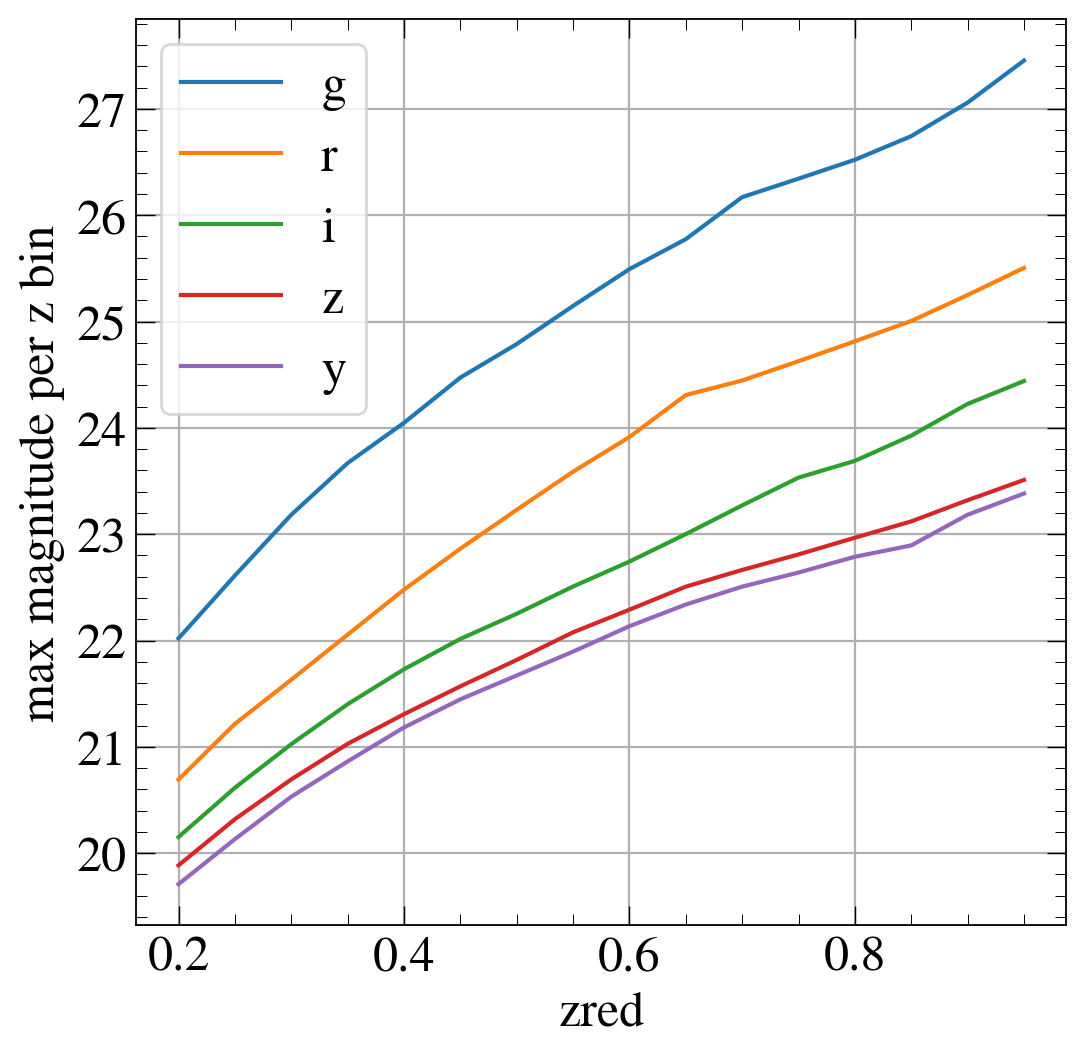

In [89]:
plt.plot(mag_max['z_bins'], mag_max['g'], label='g')
plt.plot(mag_max['z_bins'], mag_max['r'], label='r')
plt.plot(mag_max['z_bins'], mag_max['i'], label='i')
plt.plot(mag_max['z_bins'], mag_max['z'], label='z')
plt.plot(mag_max['z_bins'], mag_max['y'], label='y')
plt.xlabel('zred')
plt.ylabel('max magnitude per z bin')
plt.legend()
plt.show()

In [90]:
mag_max

g,r,i,z,y,members/z,z_bins
float32,float32,float32,float32,float32,float32,float64
22.019901,20.692474,20.15181,19.885788,19.7085,0.24996755,0.2
22.610508,21.215973,20.61499,20.319208,20.131945,0.29996905,0.25
23.182274,21.63084,21.025217,20.693573,20.531038,0.34989566,0.3
23.668467,22.054928,21.400633,21.027939,20.862644,0.3999985,0.35
24.047155,22.478008,21.729612,21.307226,21.182173,0.44999427,0.4
24.472485,22.863373,22.014719,21.568916,21.446802,0.49999067,0.45
24.788128,23.228853,22.251465,21.81742,21.671282,0.54999125,0.5
25.146406,23.587412,22.507803,22.077192,21.895603,0.5999831,0.55
25.49279,23.913769,22.742197,22.289955,22.13464,0.6499645,0.6
